<div style="border:solid Chocolate 2px; padding: 40px">

<b>Привет!👋</b>

Меня зовут Роман Абрамов, я буду ревьюером твоего проекта. Ты можешь обращаться ко мне на "ты"😏 Надеюсь, тебя также не смутит, если я буду обращаться к тебе на "ты", но если это неудобно, обязательно скажи об этом!

Пожалуйста, не удаляй мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта.

Ты также можешь реагировать на мои комментарии своими, выделяя их цветами и наиболее понравившимся тебе способом оформления, но явно  отличающимся от моих комментариев. Это нужно, чтобы не создавалась путаница😉

Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы. Желтые замечания и рекомендации необязательны к исправлению - на то это и рекомендации. Они больше ориентированы на улучшение твоих навыков
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>


<b>На доработку🤔:</b>
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>

Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой руководитель будет поступать также. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку!🤓

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Модель-LogisticRegression" data-toc-modified-id="Модель-LogisticRegression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Модель LogisticRegression</a></span></li><li><span><a href="#Модель-DecisionTreeClassifier" data-toc-modified-id="Модель-DecisionTreeClassifier-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Модель DecisionTreeClassifier</a></span></li><li><span><a href="#Модель-CatBoost" data-toc-modified-id="Модель-CatBoost-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Модель CatBoost</a></span></li><li><span><a href="#Проверка-на-тестовой-выборке" data-toc-modified-id="Проверка-на-тестовой-выборке-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Проверка на тестовой выборке</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других.

Основная цель:  
Определить и построить постройте модель со значением метрики качества *F1* не меньше 0.75 для дальнейшего использования как инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Описание данных:  

* Столбец *text* - содержит текст комментария
* Столбец *toxic* - целевой признак.

## Подготовка

Делаю импорты в алфавитном порядке

In [2]:
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import re
#import torch
#import transformers
#from catboost import CatBoostClassifier
#from catboost.text_processing import Tokenizer
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
#from pymystem3 import Mystem
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from tqdm import notebook

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b>

Супер, что импорты были собраны в одну ячейку, но так же стоит соблюдать рекомендации PEP-8 при написании кода. У импортов есть тоже определенные правила. Это сделано для повышения читабельность и простоты работы с кодом.  <br>

https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html



In [3]:
df = pd.read_csv ('⁨/Users/andreyshagin/Downloads/toxic_comments.csv')


FileNotFoundError: [Errno 2] No such file or directory: '\u2068/Users/andreyshagin/Downloads/toxic_comments.csv'

Проверяю общую информацию методом info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB


Проверяю наличие дубликатов - отсутствуют

In [4]:
df.duplicated().sum()

0

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 

Хорошо, что работаешь с дубликатами - они могут навредить нашей модели при обучении

Проверяю наличие пропусков - отсутствуют, предобработка не требуется

In [5]:
df.isna().sum()

Unnamed: 0    0
text          0
toxic         0
dtype: int64

В столбце 'toxic' отмечен целевой признак, где 0 отмечены не токсичные комментарии, а 1 токсичные. Проверяю баланс в датафрейме токсичных и нет комментариев. Есть сильный дисбаланс: только 10% комментариев токсичные, остальные позитивные.

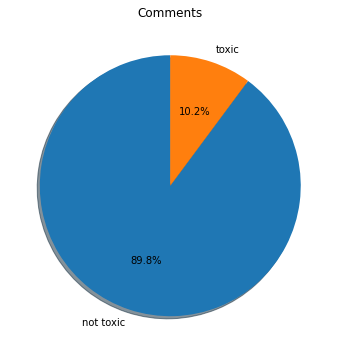

In [6]:
label = ['not toxic', 'toxic']
plt.figure(figsize=(6,6))
plt.pie(df['toxic'].value_counts(), labels=label, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Comments')
plt.show()

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Молодец, что обратил внимание на дисбаланс. Если интересно, какие можно техники применить, то советую следующий ноутбук - там все предельно ясно и четко.
    
https://github.com/Dyakonov/ml_hacks/blob/master/book_disbalance_public_v1.ipynb

В столбце 'text' есть лишние символы, необходимо на первом этапе очистить текст от них.

In [7]:
df

,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0
...,...,...,...
159287,159446,""":::::And for the second time of asking, when ...",0
159288,159447,You should be ashamed of yourself \n\nThat is ...,0
159289,159448,"Spitzer \n\nUmm, theres no actual article for ...",0
159290,159449,And it looks like it was actually you who put ...,0


Очищаю текст с помощью регулярных выражений от лишних симноволов.

In [8]:
def clear_text(text):
    clear = re.sub (r'[^a-zA-Z]', ' ', text)
    clear_split = clear.split()
    clear_join = " ".join (clear_split)
    return clear_join


In [9]:
df['text'] = df['text'].apply(clear_text)

Проверяю, что лишних символов больше нет.

In [10]:
df

,Unnamed: 0,text,toxic
0,0,Explanation Why the edits made under my userna...,0
1,1,D aww He matches this background colour I m se...,0
2,2,Hey man I m really not trying to edit war It s...,0
3,3,More I can t make any real suggestions on impr...,0
4,4,You sir are my hero Any chance you remember wh...,0
...,...,...,...
159287,159446,And for the second time of asking when your vi...,0
159288,159447,You should be ashamed of yourself That is a ho...,0
159289,159448,Spitzer Umm theres no actual article for prost...,0
159290,159449,And it looks like it was actually you who put ...,0


Провожу лемматизацию, использую wordnetlemmatizer, у меня вопрос по данному пункту, правильно ли проведена лемматизация, так как я сравнил датафрейм до и после и изменений не увидел. Пожалуйста, подскажи.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b>

Почти :)
        
В данном случае у тебя используется лемматизатор, который работает не совсем корректно без POS-тегов, поэтому их стоит добавить.
    

https://www.geeksforgeeks.org/python-lemmatization-approaches-with-examples/


<font color='purple'><b>Комментарий студента</b></font> Вроде получилось, по датафрейму после изменения видны, спасибо

In [11]:
lemmatizer = WordNetLemmatizer()

In [12]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [13]:
def pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:         
        return None

In [14]:
def lemmatize (text):
    pos_tagged = nltk.pos_tag(nltk.word_tokenize(text))
    wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged))
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatized_sentence.append(word)
        else:       
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    lemmatized_sentence = " ".join(lemmatized_sentence)
    return lemmatized_sentence


In [15]:
# def filter_stop_words (text_filter):
#     words = nltk.word_tokenize(text_filter)
#     wordsFiltered = []
#     for w in words:
#         if w not in stopWords:
#             wordsFiltered.append(w)
#     return wordsFiltered 

In [16]:
%%time
df['text'] = df['text'].apply(lemmatize)

CPU times: user 7min 2s, sys: 3.19 s, total: 7min 5s
Wall time: 7min 5s


In [21]:

from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

stopWords = set(stopwords.words('english'))

def filter_stop_words (text_filter):
    words = nltk.word_tokenize(text_filter)
    wordsFiltered = []
    for w in words:
        if w not in stopWords:
            wordsFiltered.append(w)
    return " ".join(wordsFiltered)

df['text'] = df['text'].apply(filter_stop_words)

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [22]:
#df['text'] = df['text'].apply(filter_stop_words)

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b>
        
Как улучшить EDA:

Можно было бы добавить распределение самых встречаемых слов / облако слов. Посмотреть на самые встречаемые слова в 2х классах и т.п. Отличный гайд доступен по ссылке. Это необходимо для того, чтобы понимать, с чем же придется работать.

https://towardsdatascience.com/nlp-part-3-exploratory-data-analysis-of-text-data-1caa8ab3f79d

<font color='purple'><b>Комментарий студента</b></font> Спасибо за гайд, получилось вывести облако для 100 популрных слов и еще топ 25 слов + отдельно в разбивке для не токсичных и токсичных комментариев.  
У меня вопрос, в популярных словах у меня много местоимений, союзов и прочего. Например, при сравнении топ слов для токсичных и не токсичных комментариев вижу только слово "fuck" в токсичных, а остальное все метоимения, союзы и т.д. Их надо как то тоже почистить или это просто особенность данного датафрейма?

<div class="alert alert-success">

<h2> Комментарий ревьюера 2 итерация <a class="tocSkip"> </h2>

Да, конечно же, необходимо так же отчистить стоп-слова, вообще можно использовать ещё tf-idf метрику, чтобы определить слова, которые более важны для документов с токсическими комментариями и без

In [22]:
def split(text):
    text_split = text.split()
    return text_split

In [23]:
df['text_split'] = df['text'].apply(split)

In [24]:
df

,Unnamed: 0,text,toxic,text_wo_sw,text_split
0,0,Explanation Why edits make username Hardcore M...,0,Explanation Why edits make username Hardcore M...,"[Explanation, Why, edits, make, username, Hard..."
1,1,D aww He match background colour I seemingly s...,0,D aww He match background colour I seemingly s...,"[D, aww, He, match, background, colour, I, see..."
2,2,Hey man I really try edit war It guy constantl...,0,Hey man I really try edit war It guy constantl...,"[Hey, man, I, really, try, edit, war, It, guy,..."
3,3,More I make real suggestion improvement I wond...,0,More I make real suggestion improvement I wond...,"[More, I, make, real, suggestion, improvement,..."
4,4,You sir hero Any chance remember page,0,You sir hero Any chance remember page,"[You, sir, hero, Any, chance, remember, page]"
...,...,...,...,...,...
159287,159446,And second time ask view completely contradict...,0,And second time ask view completely contradict...,"[And, second, time, ask, view, completely, con..."
159288,159447,You ashamed That horrible thing put talk page,0,You ashamed That horrible thing put talk page,"[You, ashamed, That, horrible, thing, put, tal..."
159289,159448,Spitzer Umm theres actual article prostitution...,0,Spitzer Umm theres actual article prostitution...,"[Spitzer, Umm, theres, actual, article, prosti..."
159290,159449,And look like actually put speedy first versio...,0,And look like actually put speedy first versio...,"[And, look, like, actually, put, speedy, first..."


In [25]:
words = df['text_split']
allwords = []
for wordlist in words:
    allwords += wordlist


In [26]:
from nltk.probability import FreqDist

In [27]:
print(allwords[:20])

['Explanation', 'Why', 'edits', 'make', 'username', 'Hardcore', 'Metallica', 'Fan', 'revert', 'They', 'vandalism', 'closure', 'GAs', 'I', 'vote', 'New', 'York', 'Dolls', 'FAC', 'And']


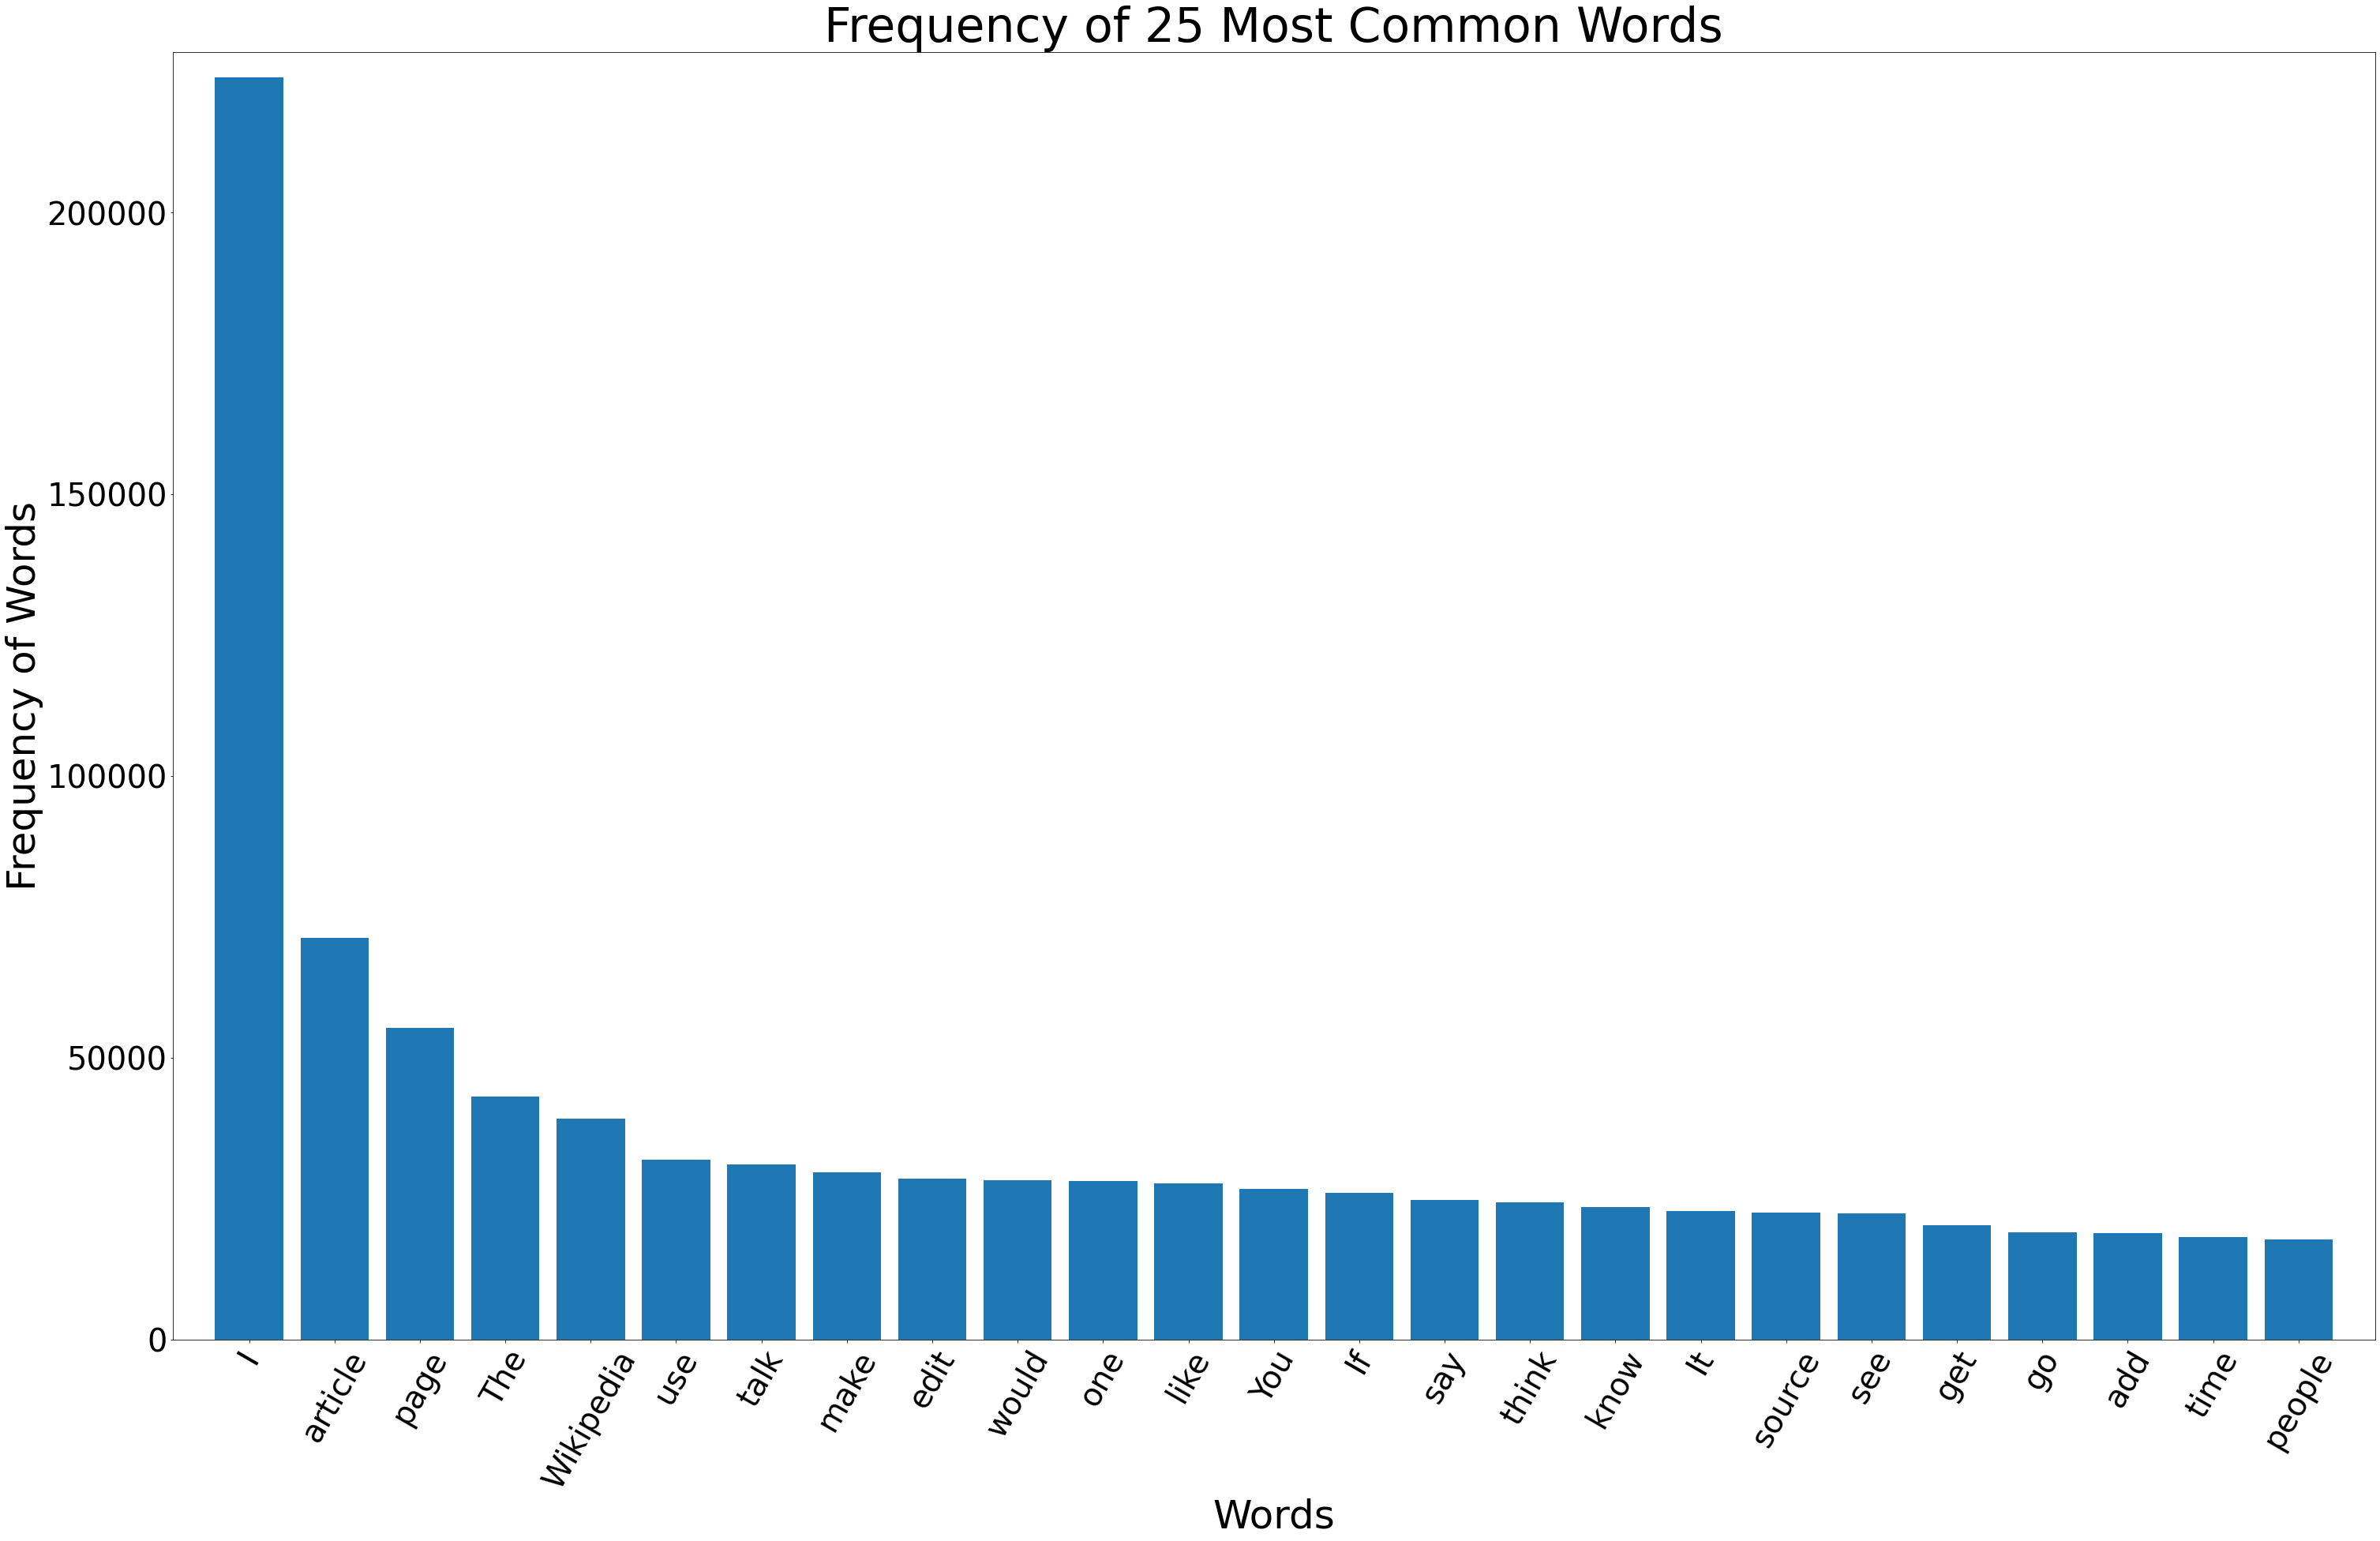

In [28]:
mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words', fontsize=60)
plt.show()

In [29]:
from collections import Counter

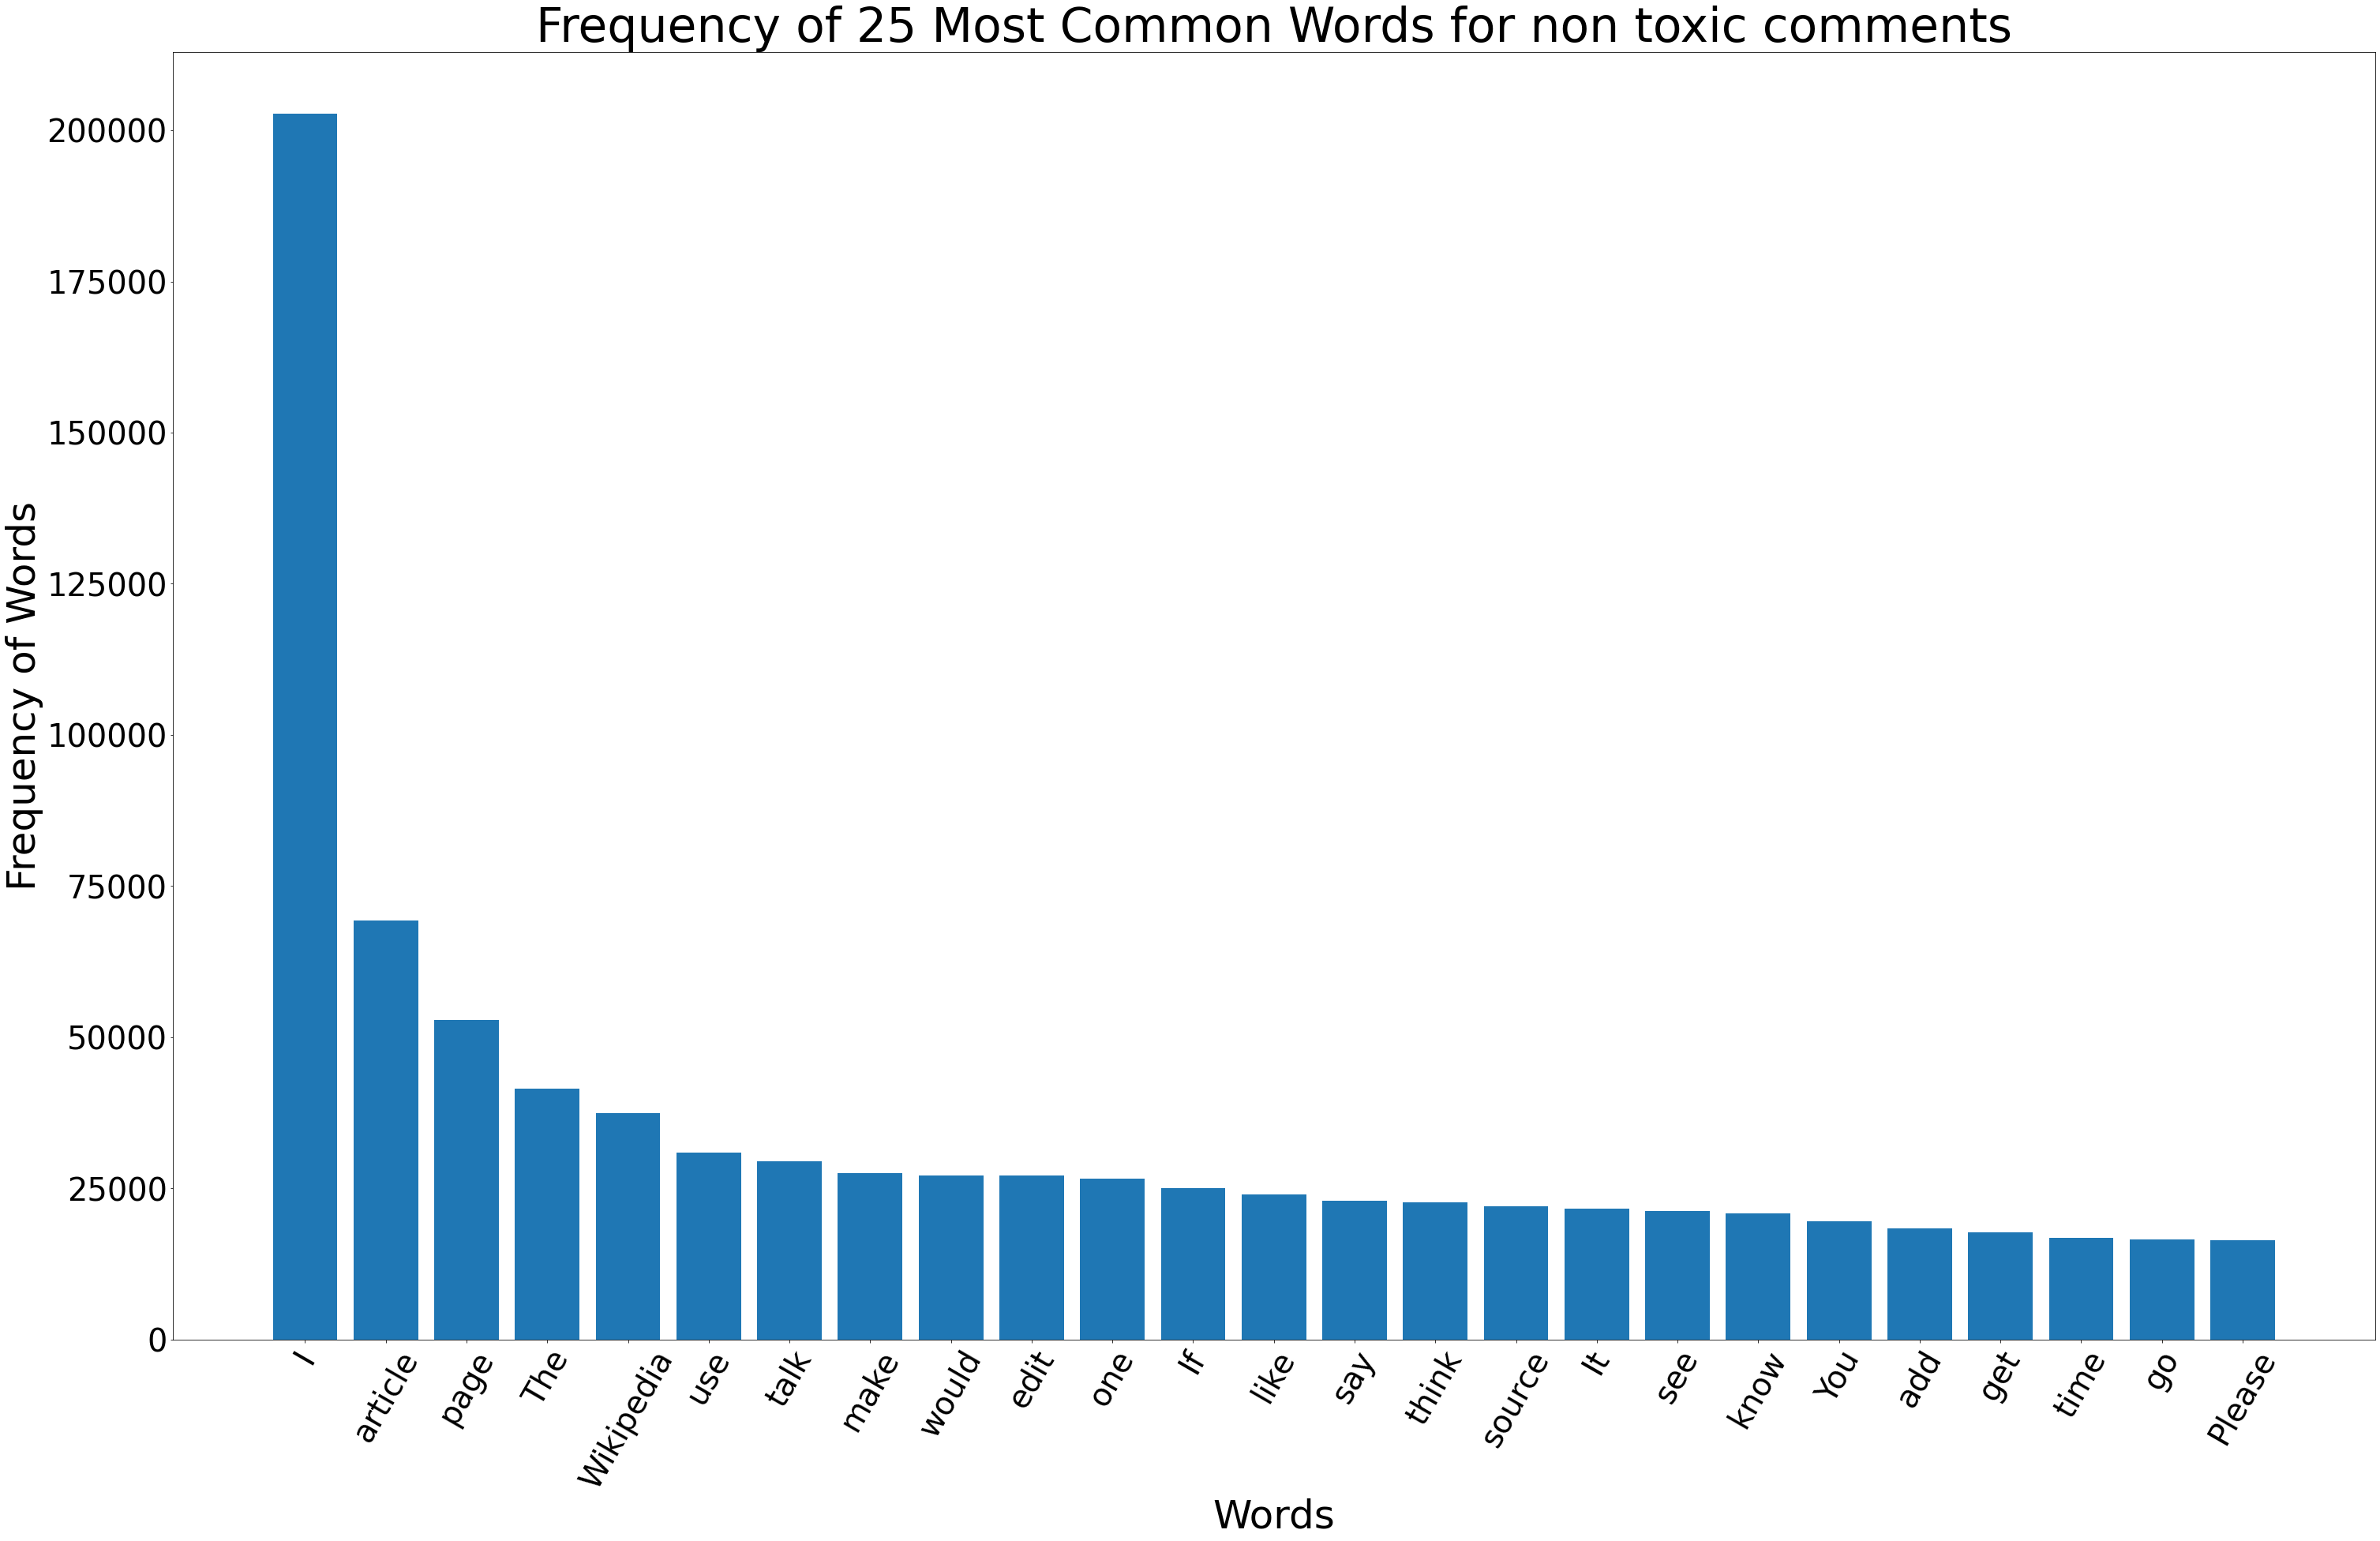

In [30]:
group_by = df.groupby('toxic')['text'].apply(lambda x: Counter(' '.join(x).split()).most_common(25))
group_by_0 = group_by.iloc[0]
words0 = list(zip(*group_by_0))[0]
freq0 = list(zip(*group_by_0))[1]
plt.figure(figsize=(50,30))
plt.bar(words0, freq0)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for non toxic comments', fontsize=60)
plt.show()

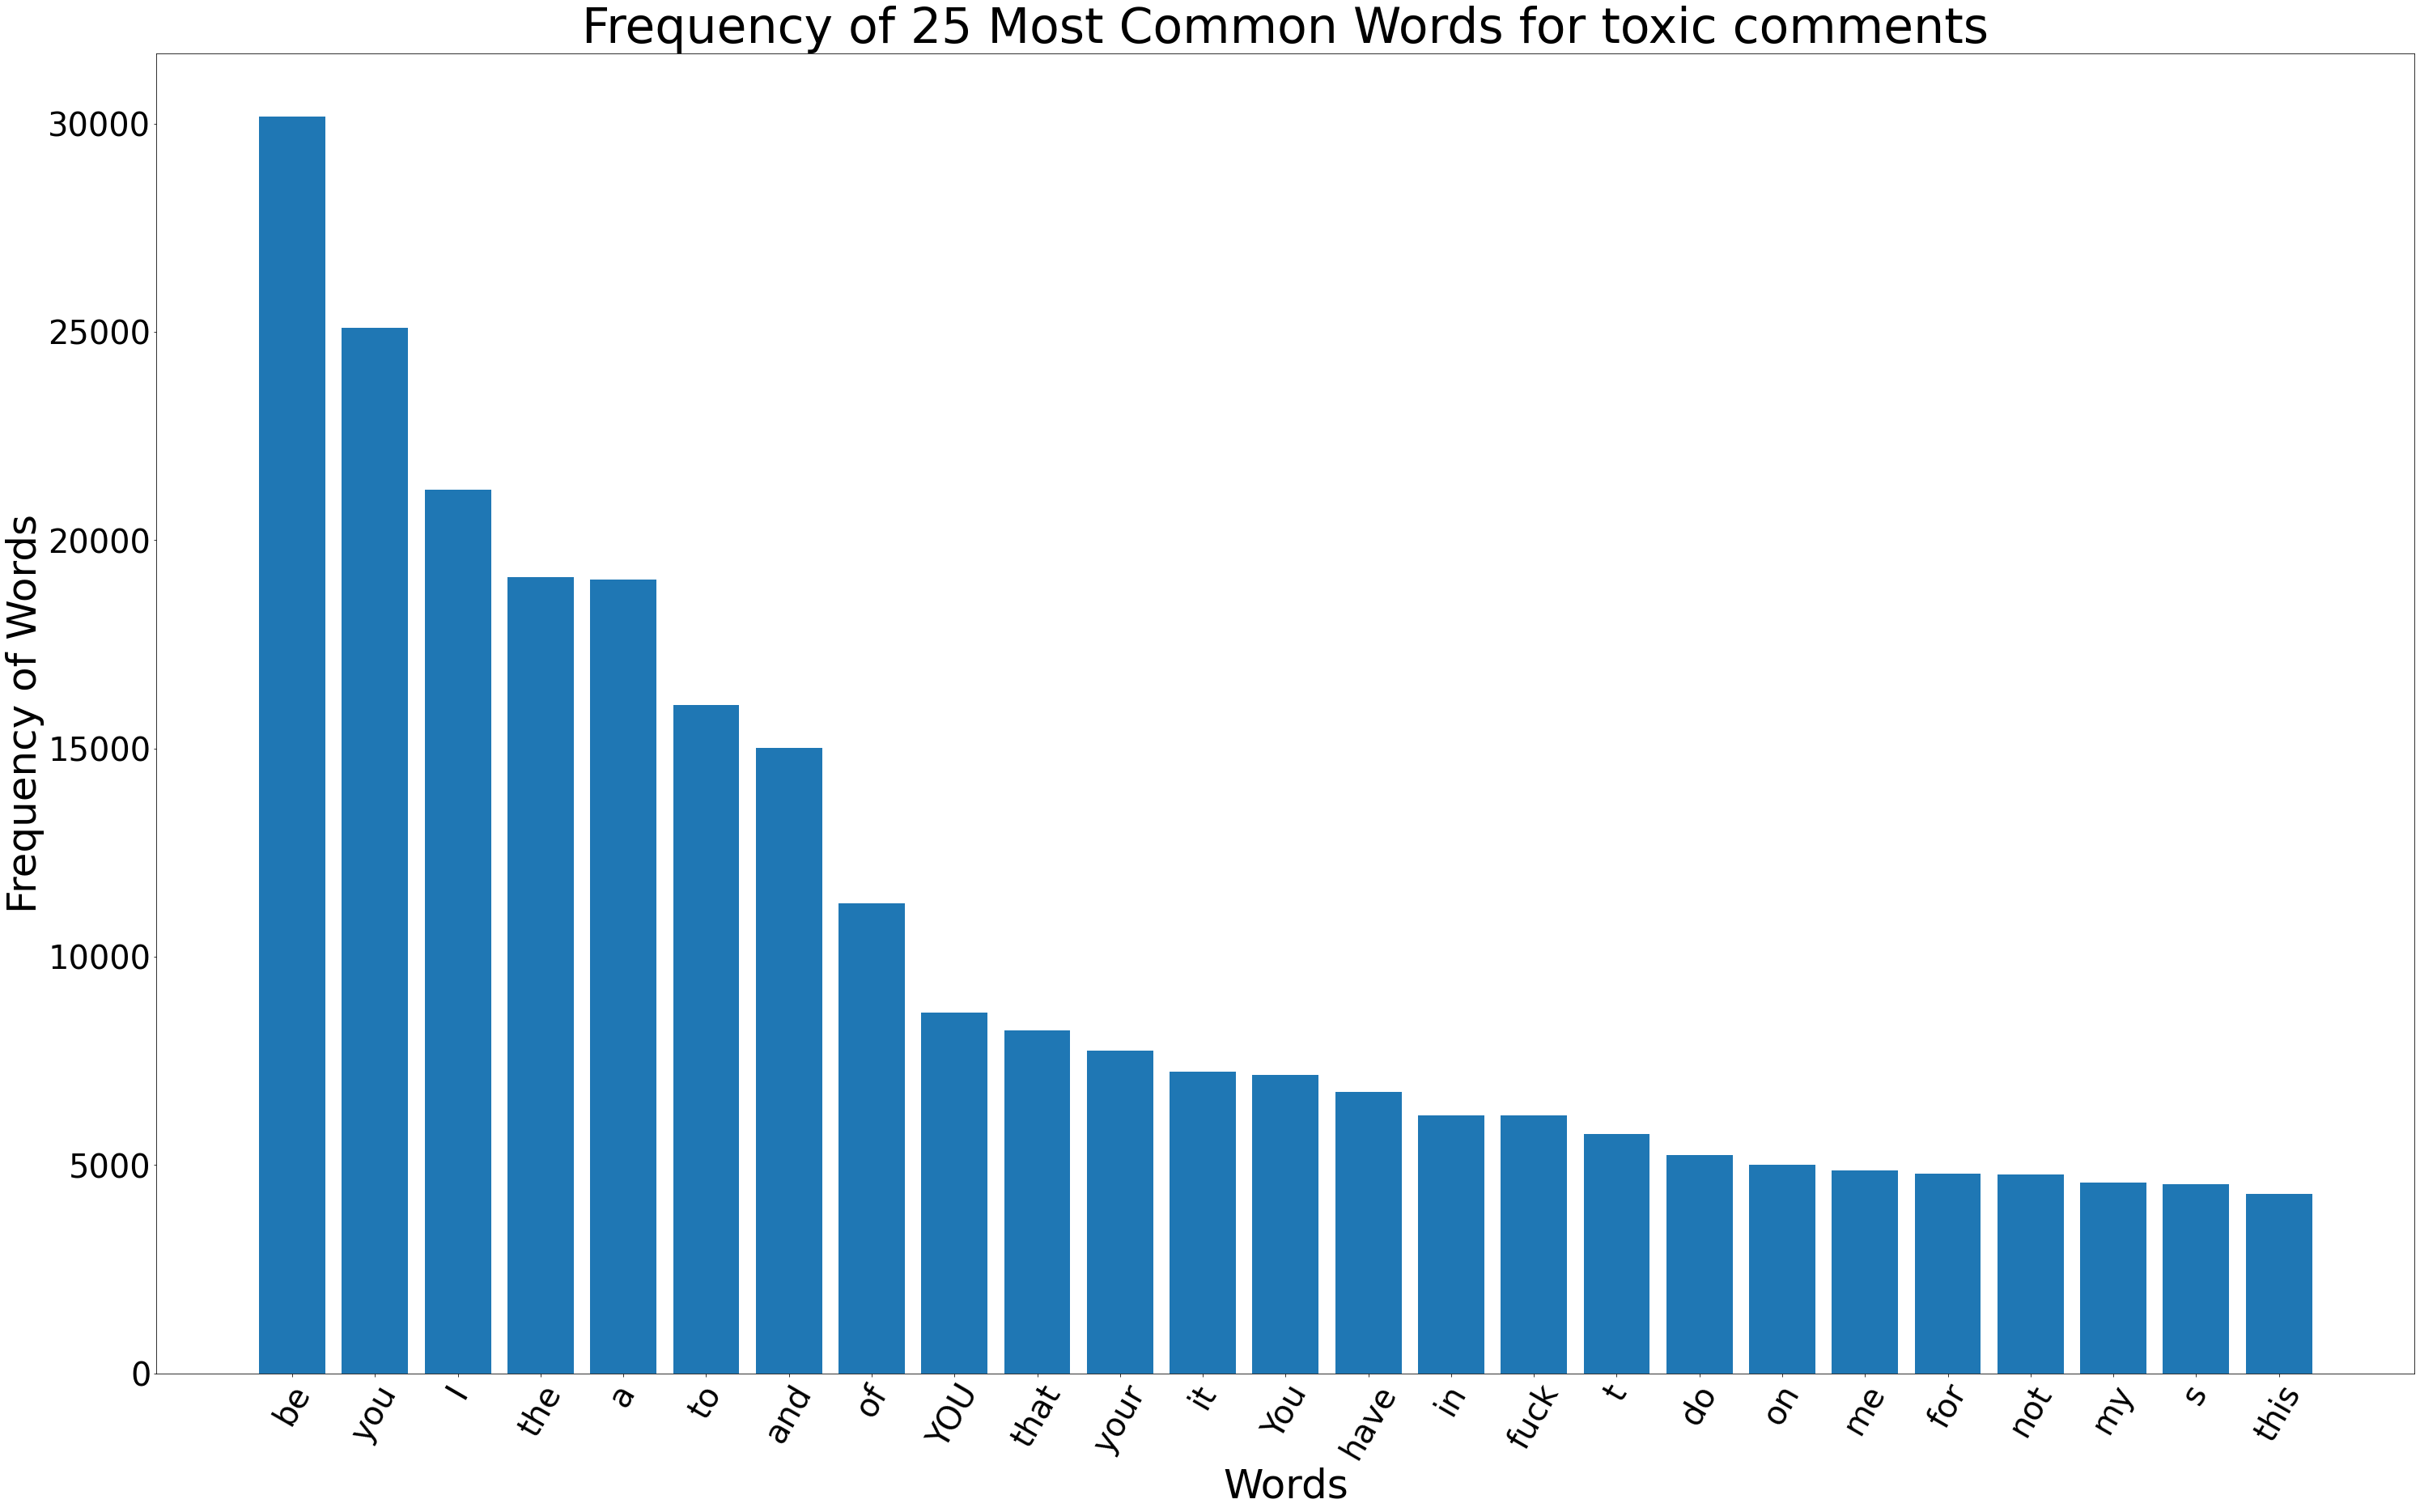

In [33]:
group_by_1 = group_by.iloc[1]
words1 = list(zip(*group_by_1))[0]
freq1 = list(zip(*group_by_1))[1]
plt.figure(figsize=(50,30))
plt.bar(words1, freq1)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for toxic comments', fontsize=60)
plt.show()

In [31]:
!pip install wordcloud

     |████████████████████████████████| 458 kB 1.1 MB/s eta 0:00:01


In [32]:
from wordcloud import WordCloud

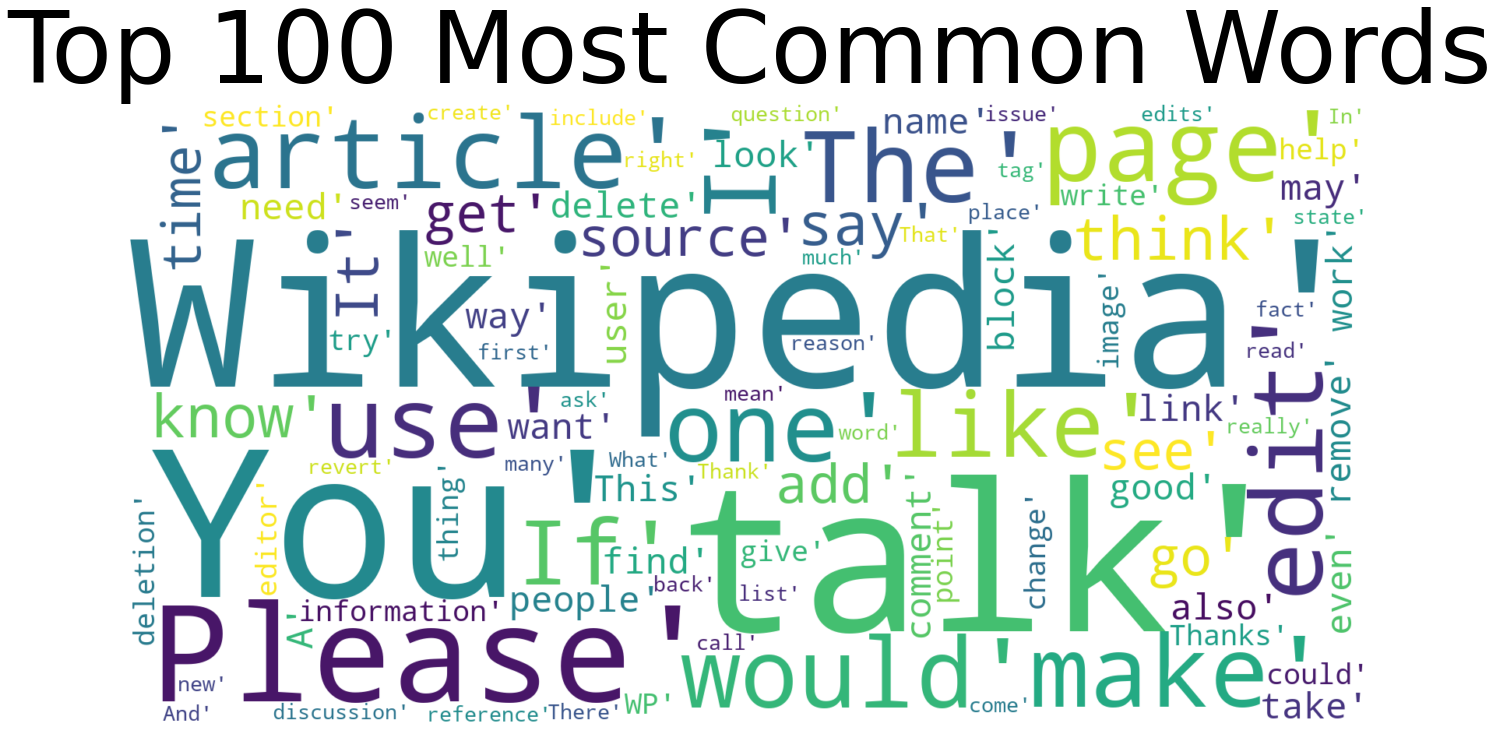

In [33]:
mostcommon = FreqDist(allwords).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=100)
plt.tight_layout(pad=0)
plt.show()

## Обучение

Целевая переменная 'toxic', признак 'text'

In [34]:
features = df['text']
target = df['toxic']

Разделяю на выборки в соотношении 60/20/20 тренировочная, валидационная, тестовая выборка. Добавляю стратификацию для сохранения баланса.

In [35]:
features_train, features_valid_1, target_train, target_valid_1 = train_test_split(
    features, target, test_size=0.40, random_state=42, stratify = df['toxic'])

In [36]:
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid_1, target_valid_1, test_size=0.50, random_state=42, stratify = target_valid_1)

Проверка размера выборок

In [37]:
def check_size (frames, start_frame):
    return display ("{0:.0%}".format(len(frames)/len(start_frame)))

In [38]:
check_size (features_valid, features)

'20%'

In [39]:
check_size (features_test, features)

'20%'

In [40]:
check_size (features_train, features)

'60%'

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 

Хорошо, молодец, что верифицируешь полученные данные - так легче обнаружить ошибку

Загружаю стоп-слова, для учета слов без смысловой нагрузки

In [41]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
features_train_corpus = features_train
features_valid_corpus = features_valid
features_test_corpus = features_test

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>


<b>На доработку🤔:</b>

Трансформация в юникод необходимо лишь при работе не латинскими символами, например, русскими. И то в python 3 стандартная кодировка при работе со строками - юникод, поэтому это редко имеет смысл.

<font color='purple'><b>Комментарий студента</b></font> Убрал кодировку, спасибо!

In [43]:
stop_words = set(stopwords.words('english'))

In [44]:
count_tf_idf = TfidfVectorizer(stop_words=stop_words)

In [45]:
count_tf_idf

TfidfVectorizer(stop_words={'a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...})

Рассчитываю оценку важдности TF IDF для ранее созданного корпуса текстов для всех выборок

In [46]:
features_train_vector = count_tf_idf.fit_transform(features_train_corpus)
features_valid_vector = count_tf_idf.transform(features_valid_corpus)
features_test_vector = count_tf_idf.transform(features_test_corpus)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 

Обучение лишь на тренировочной выборке - отлично

### Модель LogisticRegression

In [48]:
model_lr = LogisticRegression(random_state=42)

Обучаю модель и делаю предсказания с параметрами по умолчанию.

In [49]:
model_lr.fit (features_train_vector, target_train)

LogisticRegression(random_state=42)

Результат получился ниже целевого, подбираю параметры

In [50]:
model_lr_pred = model_lr.predict(features_valid_vector)
lr_f1 = f1_score(target_valid, model_lr_pred)
lr_f1

0.7307619943555974

Для подбора параметров использую GridSearch

In [51]:
parameters_lr = {
    'class_weight':['balanced'],
    'C':[2],
    'max_iter':[300,500]}

In [52]:
grid_lr = GridSearchCV(model_lr, param_grid=parameters_lr, scoring='f1',verbose=3, cv=5, n_jobs=-1)

In [53]:
grid_lr.fit (features_train_vector, target_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END .......C=2, class_weight=balanced, max_iter=300; total time=  55.6s
[CV 2/5] END .......C=2, class_weight=balanced, max_iter=300; total time=  48.8s
[CV 3/5] END .......C=2, class_weight=balanced, max_iter=300; total time=  34.6s
[CV 4/5] END .......C=2, class_weight=balanced, max_iter=300; total time=  33.0s
[CV 5/5] END .......C=2, class_weight=balanced, max_iter=300; total time=  47.6s
[CV 1/5] END .......C=2, class_weight=balanced, max_iter=500; total time=  50.0s
[CV 2/5] END .......C=2, class_weight=balanced, max_iter=500; total time=  46.1s
[CV 3/5] END .......C=2, class_weight=balanced, max_iter=500; total time=  32.8s
[CV 4/5] END .......C=2, class_weight=balanced, max_iter=500; total time=  30.4s
[CV 5/5] END .......C=2, class_weight=balanced, max_iter=500; total time=  46.4s


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [2], 'class_weight': ['balanced'],
                         'max_iter': [300, 500]},
             scoring='f1', verbose=3)

In [54]:
lr_f1_grid = grid_lr.best_score_

Результат соответствует целевому минимму в 0.75

In [55]:
lr_f1_grid

0.7524573251333704

In [56]:
grid_lr.best_params_

{'C': 2, 'class_weight': 'balanced', 'max_iter': 300}

### Модель DecisionTreeClassifier

Обучаю модель и делаю предсказания с параметрами по умолчанию.

In [57]:
model_tree = DecisionTreeClassifier(random_state = 42)

In [58]:
model_tree.fit (features_train_vector, target_train)

DecisionTreeClassifier(random_state=42)

Результат получился ниже целевого, также пробую подобрать гиперпараметры, чтобы улучшить показатель, также с помощью GridSearch

In [59]:
model_tree_pred = model_tree.predict(features_valid_vector)
tree_f1 = f1_score(target_valid, model_lr_pred)
tree_f1

0.7307619943555974

In [60]:
parameters_tree = {'max_depth':[x for x in range(70,191,40)]}

In [61]:
grid_tree = GridSearchCV(model_tree, param_grid=parameters_tree,scoring='f1', verbose = 3)

In [62]:
grid_tree.fit (features_train_vector, target_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ...................................max_depth=70; total time=  22.4s
[CV 2/5] END ...................................max_depth=70; total time=  22.1s
[CV 3/5] END ...................................max_depth=70; total time=  22.2s
[CV 4/5] END ...................................max_depth=70; total time=  21.7s
[CV 5/5] END ...................................max_depth=70; total time=  22.1s
[CV 1/5] END ..................................max_depth=110; total time=  32.1s
[CV 2/5] END ..................................max_depth=110; total time=  32.0s
[CV 3/5] END ..................................max_depth=110; total time=  32.0s
[CV 4/5] END ..................................max_depth=110; total time=  31.3s
[CV 5/5] END ..................................max_depth=110; total time=  32.1s
[CV 1/5] END ..................................max_depth=150; total time=  41.4s
[CV 2/5] END ..................................ma

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [70, 110, 150, 190]}, scoring='f1',
             verbose=3)

In [63]:
tree_f1_grid = grid_tree.best_score_

In [64]:
tree_f1_grid

0.7214404007347317

Результат близкий к модели с параметрами по умолчанию, данная модель не подходит для текущего проекта.

In [65]:
model_tree_pred = grid_tree.predict(features_valid_vector)
tree_f1_tuned = f1_score(target_valid, model_tree_pred)
tree_f1_tuned

0.7154046997389034

In [66]:
grid_tree.best_params_

{'max_depth': 190}

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b>

Тут возможно бы использовать функцию, чтобы не дублировать код. Если повторять его, то становится куда сложнее его поддерживать - приходится искать в коде изменяющиеся части и проводить замену несколько раз - вероятность ошибиться в таком случае куда выше, чем при использовании функций. Плюс чисто физически это занимает меньше места и становится проще читать

<font color='purple'><b>Комментарий студента</b></font> Не смог сделать, пытался найти пример кода, но все было очень сложное, стал пытаться сам, но куда то не туда видимо ушел. Если можешь, подсказать, пожалуйста, помоги.  
Еще я не понял в идеале нужно вообще одну функцию для всех моделей написать? И просто подставлять туда разные параметры, которые иногда отличаются между моделями?

In [64]:
# parameters_tree = {'max_depth':[x for x in range(70,191,40)]}

In [65]:
# def tree_model (model_input, parameters_model):
#     model_input.fit (features_train_vector, target_train)
#     model_pred = model_input.predict(features_valid_vector)
#     f1 = f1_score(target_valid, model_pred)
#     grid = GridSearchCV(model_input, param_grid=parameters_model,scoring='f1', verbose = 3)
#     grid.fit (features_train_vector, target_train)
#     f1_grid = grid.best_score_
#     model_pred = grid.predict(features_valid_vector)
#     f1_tuned = f1_score(target_valid, model_pred)
#     return tree_model (model_input, parameters_model)

In [66]:
# tree_model (DecisionTreeClassifier(), parameters_tree)

### Модель CatBoost

In [67]:
model_cat = CatBoostClassifier(learning_rate=0.5,
                          depth=3,
                         verbose = 100,
                              random_seed=42,
                              eval_metric = 'F1')

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b>        
Кстати, CatBoost поддерживает работу с текстом "из коробки" - можно было попробовать такой метод. Но он работает только с GPU. Если интересно, то тут с примером и сравнение с BERT для похожей задачи.
        
https://towardsdatascience.com/unconventional-sentiment-analysis-bert-vs-catboost-90645f2437a9

Тут очень классный ноутбук

https://github.com/catboost/tutorials/blob/master/text_features/text_features_in_catboost.ipynb

<font color='purple'><b>Комментарий студента</b></font> Нет возможности с GPU, но сохраню, может появится, спасибо!

<div class="alert alert-success">

<h2> Комментарий ревьюера 2 итерация <a class="tocSkip"> </h2>

Можешь посмотреть и попробовать на коллабе (поищи, если не знаешь - сервис гугла, очень классный, там можно и с gpu работать)

In [68]:
model_cat.fit (features_train_vector, target_train)

0:	learn: 0.3769390	total: 741ms	remaining: 12m 20s
100:	learn: 0.7431728	total: 59.9s	remaining: 8m 53s
200:	learn: 0.7766816	total: 1m 57s	remaining: 7m 47s
300:	learn: 0.7949367	total: 2m 54s	remaining: 6m 45s
400:	learn: 0.8142956	total: 3m 52s	remaining: 5m 47s
500:	learn: 0.8252327	total: 4m 50s	remaining: 4m 49s
600:	learn: 0.8314555	total: 5m 47s	remaining: 3m 50s
700:	learn: 0.8335333	total: 6m 44s	remaining: 2m 52s
800:	learn: 0.8359009	total: 7m 41s	remaining: 1m 54s
900:	learn: 0.8384558	total: 8m 39s	remaining: 57s
999:	learn: 0.8421652	total: 9m 36s	remaining: 0us


У модели получился самый большой показатель F1

In [69]:
model_cat_pred = model_cat.predict(features_valid_vector)
cat_f1 = f1_score(target_valid, model_cat_pred)
cat_f1

0.7610434782608695

In [71]:
model_cat2 = CatBoostClassifier(learning_rate=0.55,
                          depth=3,
                         verbose = 100,
                              random_seed=42,
                              eval_metric = 'F1')

In [72]:
model_cat2.fit (features_train_vector, target_train)

0:	learn: 0.3769390	total: 712ms	remaining: 11m 51s
100:	learn: 0.7458811	total: 1m	remaining: 8m 54s
200:	learn: 0.7797134	total: 1m 58s	remaining: 7m 49s
300:	learn: 0.8044758	total: 2m 55s	remaining: 6m 47s
400:	learn: 0.8242118	total: 3m 53s	remaining: 5m 48s
500:	learn: 0.8332953	total: 4m 50s	remaining: 4m 49s
600:	learn: 0.8362477	total: 5m 47s	remaining: 3m 50s
700:	learn: 0.8399454	total: 6m 43s	remaining: 2m 52s
800:	learn: 0.8408548	total: 7m 41s	remaining: 1m 54s
900:	learn: 0.8421412	total: 8m 38s	remaining: 56.9s
999:	learn: 0.8455644	total: 9m 34s	remaining: 0us


In [73]:
model_cat_pred2 = model_cat2.predict(features_valid_vector)
cat_f12 = f1_score(target_valid, model_cat_pred2)
cat_f12

0.7602561883330449

In [75]:
pred_test2 = model_cat2.predict(features_test_vector)
f1_test_cat2 = f1_score(target_test, pred_test2)
f1_test_cat2

0.7459670271228506

Тут у меня вопрос, я хотел еще попробовать улучшить модель, через GridSearch, но модель считает много раз, как будто попадает в цикл. в прошлом проекте работало, можешь, пожалуйста, посмотреть все ли у меня правильно?

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b>


Вроде бы все ок. Не забывай, что GridSearch ищет параметры через кросс-валидацию, поэтому модель обучается несколько раз на одних и тех же параметрах - возможно, что тебя это смутило?

<font color='purple'><b>Комментарий студента</b></font> Я просто не дождался конца обучения, оно продолжалось новыми циклами и я подуммал, что ошибка. Запустил, прождал больше 4 часов, так и не дождался конца. У меня всего два параметра скорость обучения, вроде кросс-валидация обычно на 3 или 5 выборок делит, то есть больше 10 раз не должно быть или я не понимаю?

In [76]:
from catboost import Pool
from catboost import cv

In [77]:
train_data = Pool(data=features_train_vector,
              label=target_train
              )

In [78]:
model_params = {'random_state': 42,
                'eval_metric': 'F1',
                'verbose': 100,
                'loss_function': 'Logloss',
                'learning_rate': 0.4}

In [79]:
cv_params = {'params': model_params,
             'pool': train_data,
             'fold_count': 3,
             'shuffle':True,
             'partition_random_seed':42,
             'stratified':True,
             'verbose': 100,
             'early_stopping_rounds':200}

In [80]:
cv_data = cv(**cv_params)

Training on fold [0/3]
0:	learn: 0.2964229	test: 0.2708611	best: 0.2708611 (0)	total: 1.49s	remaining: 24m 50s
100:	learn: 0.7751110	test: 0.7115385	best: 0.7115385 (95)	total: 1m 54s	remaining: 17m 1s
200:	learn: 0.8197756	test: 0.7330922	best: 0.7330922 (200)	total: 3m 46s	remaining: 14m 59s
300:	learn: 0.8353442	test: 0.7387711	best: 0.7392633 (296)	total: 5m 37s	remaining: 13m 3s
400:	learn: 0.8423233	test: 0.7405551	best: 0.7413515 (323)	total: 7m 27s	remaining: 11m 8s
500:	learn: 0.8532441	test: 0.7380825	best: 0.7413515 (323)	total: 9m 18s	remaining: 9m 15s

bestTest = 0.7413514967
bestIteration = 323

Training on fold [1/3]
0:	learn: 0.3806220	test: 0.3761150	best: 0.3761150 (0)	total: 1.49s	remaining: 24m 46s
100:	learn: 0.7684622	test: 0.7126949	best: 0.7134090 (87)	total: 1m 54s	remaining: 17m
200:	learn: 0.8160154	test: 0.7336829	best: 0.7345021 (193)	total: 3m 46s	remaining: 15m
300:	learn: 0.8301952	test: 0.7375631	best: 0.7387615 (278)	total: 5m 37s	remaining: 13m 2s
400

In [81]:
model3 = CatBoostClassifier(**model_params)

In [82]:
model3.fit(train_data)

0:	learn: 0.3770329	total: 2.11s	remaining: 35m 5s
100:	learn: 0.7675963	total: 2m 37s	remaining: 23m 18s
200:	learn: 0.8044614	total: 5m 9s	remaining: 20m 29s
300:	learn: 0.8253583	total: 7m 41s	remaining: 17m 52s
400:	learn: 0.8341189	total: 10m 12s	remaining: 15m 14s
500:	learn: 0.8413643	total: 12m 42s	remaining: 12m 39s
600:	learn: 0.8478905	total: 15m 12s	remaining: 10m 5s
700:	learn: 0.8564303	total: 17m 43s	remaining: 7m 33s
800:	learn: 0.8655116	total: 20m 14s	remaining: 5m 1s
900:	learn: 0.8752104	total: 22m 46s	remaining: 2m 30s
999:	learn: 0.8850703	total: 25m 15s	remaining: 0us


In [83]:
pred_test3 = model3.predict(features_test_vector)
f1_test_cat3 = f1_score(target_test, pred_test3)
f1_test_cat3

0.7531869688385269

In [84]:
# model_cat2 = CatBoostClassifier()
# param_search = {'eval_metric': ['F1'],
#                 'learning_rate' : [0.3, 0.6],
#                 'random_seed': [42],
#                 'verbose': [100],
#                 'iterations': [1000]
#                  }



In [85]:
# gsearch = GridSearchCV(estimator=model_cat2, cv=3, param_grid=param_search)
# gsearch.fit(features_train, target_train)

In [86]:
# print(" Results from Grid Search " )
# print("\n The best estimator across ALL searched params:\n",gsearch.best_estimator_)
# print("\n The best score across ALL searched params:\n",gsearch.best_score_)
# print("\n The best parameters across ALL searched params:\n",gsearch.best_params_)

In [87]:
# gsearch.best_params_

In [88]:
# model_cat_pred_grid = gsearch.predict(features_valid_vector)
# cat_f1_grid = f1_score(target_valid, model_cat_pred_grid)
# cat_f1_grid

### Проверка на тестовой выборке

У лучшей модели логистической регрессии на тестовой выборке показатель меньше целевого в 0.75

In [89]:
pred_test = grid_lr.predict(features_test_vector)
f1_test_lr = f1_score(target_test, pred_test)
f1_test_lr

0.7486017897091722

Модель CatBoost набирает целевой показатель в 0.75 и может быть рекомендована.

In [90]:
pred_test1 = model_cat.predict(features_test_vector)
f1_test_cat = f1_score(target_test, pred_test1)
f1_test_cat

0.7488940010617591

Делаю сводную таблицу с результатами всех моделей и результатов на тестовой выборке.

In [ ]:
LogisticRegression = {'F1': lr_f1}
LogisticRegression_tuned = {'F1': lr_f1_grid}
DecisionTreeClassifier = {'F1': tree_f1}
DecisionTreeClassifier_tuned = {'F1': tree_f1_tuned}
CatBoostRegressor = {'F1': cat_f1}
CatBoostRegressor_test = {'F1': f1_test_cat}
DecisionTreeClassifier_tuned_test = {'F1': f1_test_lr}

In [ ]:
Summary_table = pd.DataFrame([LogisticRegression, LogisticRegression_tuned, DecisionTreeClassifier, DecisionTreeClassifier_tuned, CatBoostRegressor,CatBoostRegressor_test,DecisionTreeClassifier_tuned_test],
                     index=['LogisticRegression', 'LogisticRegression_tuned', 'DecisionTreeClassifier', 'DecisionTreeClassifier_tuned', 'CatBoostRegressor', 'CatBoostRegressor_test', 'DecisionTreeClassifier_tuned_test'])
Summary_table


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 

Супер, что используешь таблицы и собираешь в них результаты - так намного легче сравнивать модели и читать получившиеся результаты

## Выводы

В качестве инструмента, который будет искать токсичные комментарии и отправлять их на модерацию рекомендуется использовать модель CatBoost.   
На валидационной выборке модель CatBoost показаала резульата F1 0.761043, на тестовой выборке 0.748894.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 

Хорошо, согласен. Можно ещё указать точную метрику и, например, информацию о получившемся датасете, чтобы вывод стал ещё более информативным

<font color='purple'><b>Комментарий студента</b></font> К сожалению сейчас метрика F1 на тестовой выборке получилась меньше 0.75, параметры моделей я не менял или предобработку, почему так получилось? Что я могу сделать?

<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту (комментарий ревьера)**

Спасибо за твой проект! Есть несколько моментов, помеченных красным, которые стоит исправить. Если хочешь получить ещё больше опыта - попробуй воспользоваться частью советов из желтых комментариев. В целом, логика проекта верна, так что уверен, что тебе не составит труда исправить все остальное.

**Отмечу отдельные положительные моменты проекта🙂**:

* Блоки кода структурированы и логичны
* Достаточное комментирование по ходу работы

**На что стоит обратить внимание🤓**:

* Трансформация в юникод редко необходима
* Остальные рекомендации ты найдешь в моих комментариях!


**Желаю удачи и жду твой проект на повторное ревью!**😉


## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Модели обучены
- [ ]  Значение метрики *F1* не меньше 0.75
- [x]  Выводы написаны